In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
hp = pd.read_csv('House Prices - Reg.csv')

In [5]:
train, test=train_test_split(hp, test_size=0.3,random_state=123)

In [6]:
hp.shape, train.shape, test.shape

((1047, 7), (732, 7), (315, 7))

In [7]:
X = hp.drop(columns= 'Price')
y=hp.Price

In [8]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3,random_state=123)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc= StandardScaler()

In [11]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [13]:
LR = LinearRegression()

In [14]:
LR.fit(X_train_std, y_train)

LinearRegression()

In [15]:
price_pred = LR.predict(X_test_std)

In [16]:
e = price_pred - y_test

In [17]:
np.mean(np.abs(e)) #Mean absolute error

27739.47693540641

In [18]:
np.mean(np.square(e)) #Mean absolute error

1499955159.8853245

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
mean_absolute_error(y_test, price_pred)

27739.47693540641

In [21]:
mean_squared_error(y_test, price_pred)

1499955159.8853245

In [22]:
from sklearn.datasets import load_breast_cancer

In [23]:
lbc = load_breast_cancer()

In [24]:
bc = pd.DataFrame(lbc.data, columns = lbc.feature_names)

In [25]:
bc['target'] = lbc.target

In [26]:
print(lbc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [27]:
bc.target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [28]:
#212 - Malignant, 357 - Benign

In [29]:
#standardizaion
# StandardScaler()
X_bc = bc.drop(columns = 'target')
y_bc = bc.target
X_bc_train, X_bc_test, y_bc_train, y_bc_test =train_test_split(X_bc, y_bc, test_size=0.33,random_state=123)
scbc = StandardScaler()

In [30]:
X_bc_train_std = scbc.fit_transform(X_bc_train)
X_bc_test_std = scbc.transform(X_bc_test)

In [31]:
LGR = LogisticRegression(max_iter=5000)

In [32]:
LGR.fit(X_bc_train_std, y_bc_train)

LogisticRegression(max_iter=5000)

In [33]:
cancer_pred = LGR.predict(X_bc_test_std)

In [34]:
err = pd.crosstab(y_bc_test, cancer_pred)

In [35]:
err

col_0,0,1
target,,
0,74,1
1,0,113


In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [37]:
accuracy_score(y_bc_test, cancer_pred)

0.9946808510638298

In [38]:
from sklearn.linear_model import SGDClassifier, SGDRegressor 

In [39]:
SGDRegressor()

SGDRegressor()

In [40]:
print(classification_report(y_bc_test, LGR.predict(X_bc_test_std)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.99      1.00      1.00       113

    accuracy                           0.99       188
   macro avg       1.00      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188



In [41]:
fpr, tpr, thresholds = roc_curve(y_bc_test, LGR.predict_proba(X_bc_test_std)[:,0], pos_label = 0)

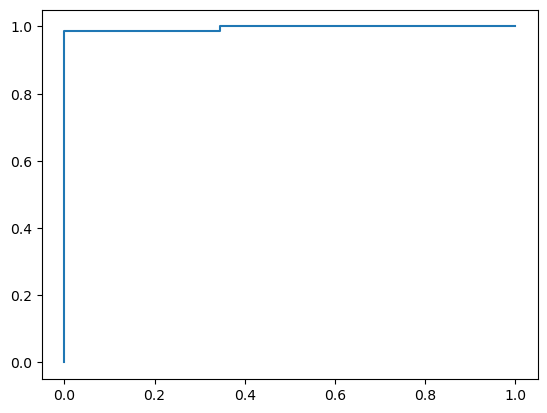

In [42]:
plt.plot(fpr, tpr)
plt.show()

In [43]:
roc_auc_score(y_bc_test, LGR.predict_proba(X_bc_test_std)[:,1])

0.9953982300884956

In [44]:
from sklearn.linear_model import SGDClassifier, SGDRegressor

In [45]:
sgd_class = SGDClassifier(loss='log')

In [46]:
sgd_class.fit(X_bc_train_std, y_bc_train)

C:\Users\sreenathk\AppData\Local\anaconda31\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log')

In [47]:
sgd_class.predict(X_bc_test_std)

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [48]:
penalty = ['l2', 'l1', 'elasticnet']
alpha = [0.01, 1, 10, 100, 1000]
l1_ratio = [0, 1, 0.5, 0.2, 0.8]
learning_rate = ['constant', 'adaptive']
eta0 = [0.001, 0.01, 0.1, 0.02, 0.8, 0.08, 1, 10, 100]

In [49]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [50]:
 param_dist = dict(penalty=penalty, alpha=alpha, l1_ratio=l1_ratio, learning_rate=learning_rate, eta0=eta0)

In [51]:
sgd_logistic = SGDClassifier()

In [52]:
rndm_cv = RandomizedSearchCV(estimator=sgd_logistic, param_distributions=param_dist, n_iter=19, n_jobs=-1, verbose=2)

In [53]:
rndm_cv.fit(X_bc_train_std, y_bc_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


RandomizedSearchCV(estimator=SGDClassifier(), n_iter=19, n_jobs=-1,
                   param_distributions={'alpha': [0.01, 1, 10, 100, 1000],
                                        'eta0': [0.001, 0.01, 0.1, 0.02, 0.8,
                                                 0.08, 1, 10, 100],
                                        'l1_ratio': [0, 1, 0.5, 0.2, 0.8],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'penalty': ['l2', 'l1', 'elasticnet']},
                   verbose=2)

In [54]:
rndm_cv.best_estimator_

SGDClassifier(alpha=0.01, eta0=0.08, l1_ratio=0.2, learning_rate='constant',
              penalty='l1')

In [55]:
rndm_cv.predict(X_bc_test_std)

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [56]:
print(classification_report(y_bc_test, rndm_cv.predict(X_bc_test_std)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        75
           1       0.99      0.99      0.99       113

    accuracy                           0.99       188
   macro avg       0.99      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188



In [57]:
train_bc, test_bc = train_test_split(bc, test_size=0.1, random_state=123)

In [58]:
train_bc['kfold_tag'] = 9999

In [59]:
train_bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,kfold_tag
164,23.27,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.09702,0.1801,0.05553,...,184.20,2403.0,0.1228,0.3583,0.39480,0.23460,0.3589,0.09187,0,9999
162,19.59,18.15,130.70,1214.0,0.11200,0.16660,0.25080,0.12860,0.2027,0.06082,...,174.90,2232.0,0.1438,0.3846,0.68100,0.22470,0.3643,0.09223,0,9999
396,13.51,18.89,88.10,558.1,0.10590,0.11470,0.08580,0.05381,0.1806,0.06079,...,97.33,675.2,0.1428,0.2570,0.34380,0.14530,0.2666,0.07686,1,9999
400,17.91,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.11980,0.2113,0.07115,...,149.60,1304.0,0.1873,0.5917,0.90340,0.19640,0.3245,0.11980,0,9999
310,11.70,19.11,74.33,418.7,0.08814,0.05253,0.01583,0.01148,0.1936,0.06128,...,80.92,483.1,0.1223,0.1087,0.07915,0.05741,0.3487,0.06958,1,9999


In [60]:
train_bc.groupby(['kfold_tag'])[['target']].count()

,target
kfold_tag,
9999,512


In [61]:
bc_cv = train_bc.sample(frac=1).reset_index(drop=True) # Shuffling the data

In [62]:
from sklearn.model_selection import KFold, StratifiedKFold

In [63]:
kf = KFold()

In [66]:
for fold, (train_indices, valid_indices) in enumerate (kf.split(bc_cv), start=1):
    # print(fold, (train_indices, valid_indices))
    bc_cv.loc[valid_indices, 'kfold_tag'] = fold

In [67]:
bc_cv.groupby(['kfold_tag'])[['target']].count()

,target
kfold_tag,
1,103
2,103
3,102
4,102
5,102


In [68]:
skf_cv = StratifiedKFold()

In [69]:
bc_cv['skfold_tag'] = 9898

In [70]:
for fold, (train_indices, valid_indices) in enumerate (skf_cv.split(bc_cv, y=bc_cv.target), start=1):
    #print(fold, (train_indices, valid_indices))
    bc_cv.loc[valid_indices, 'skfold_tag'] = fold

In [71]:
bc_cv.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,kfold_tag,skfold_tag
0,9.876,19.40,63.95,298.3,0.10050,0.09697,0.06154,0.03029,0.1945,0.06322,...,361.2,0.15590,0.23020,0.26440,0.09749,0.2622,0.08490,1,1,1
1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,0,1,1
2,27.420,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.16890,0.2061,0.05623,...,4254.0,0.13570,0.42560,0.68330,0.26250,0.2641,0.07427,0,1,1
3,10.910,12.35,69.14,363.7,0.08518,0.04721,0.01236,0.01369,0.1449,0.06031,...,392.2,0.09312,0.07506,0.02884,0.03194,0.2143,0.06643,1,1,1
4,13.850,19.60,88.68,592.6,0.08684,0.06330,0.01342,0.02293,0.1555,0.05673,...,749.1,0.11180,0.11410,0.04753,0.05890,0.2513,0.06911,1,1,1


In [108]:
bc_cv.groupby(['skfold_tag', 'target'])[['target']].count()

target
skfold_tag target        
1.0        0           38
           1           65
2.0        0           38
           1           65
3.0        0           37
           1           65
4.0        0           37
           1           65
5.0        0           38
           1           64

In [109]:
X_vars = [x_var for x_var in bc_cv.columns if x_var not in ['target', 'skfold_tag', 'kfold_tag']]

In [113]:
from sklearn.metrics import accuracy_score


In [116]:
final_pred = []
for fold in range(1,6):
    train = bc_cv[bc_cv.skfold_tag != fold]
    test = bc_cv[bc_cv.skfold_tag == fold]
    x_train = train[X_vars]
    y_train = train['target']
    x_test  = test[X_vars]
    y_test  = test['target']
    
    model = SGDClassifier()
    scbc = StandardScaler()
    x_train_std = scbc.fit_transform(x_train)
    x_test_std = scbc.transform(x_test)
    deply_X_data = scbc.transform(test_bc.drop(columns = 'target'))
    model.fit(x_train_std, y_train)
    pred_valid = model.predict(x_test_std)
    final_pred.append(model.predict(deply_X_data))
    print(fold)
    print('accuracy from fold = ', fold, 'score: ', accuracy_score(y_test, pred_valid))

1
accuracy from fold =  1 score:  1.0
2
accuracy from fold =  2 score:  0.9611650485436893
3
accuracy from fold =  3 score:  0.9117647058823529
4
accuracy from fold =  4 score:  0.9411764705882353
5
accuracy from fold =  5 score:  0.9901960784313726


In [117]:
final_pred

[array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1]),
 array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1]),
 array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1]),
 array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1]),
 array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1])]

In [118]:
import numpy as np

In [119]:
np.sum(np.array(final_pred), axis=0)

array([5, 5, 0, 5, 0, 5, 5, 5, 5, 5, 5, 0, 0, 5, 0, 5, 5, 5, 5, 5, 0, 0,
       5, 5, 5, 0, 0, 5, 0, 5, 0, 5, 5, 5, 0, 5, 5, 5, 5, 0, 0, 5, 0, 5,
       0, 5, 0, 0, 2, 0, 0, 0, 5, 5, 5, 0, 5])

In [120]:
(np.sum(np.array(final_pred), axis=0)>=3).astype('int')

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1])

In [122]:
 #Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [125]:
dt = DecisionTreeClassifier()

In [124]:
train_bc.drop(columns = ['kfold_tag'], inplace=True)

In [126]:
dt.fit(train_bc.drop(columns='target'), train_bc.target)

DecisionTreeClassifier()

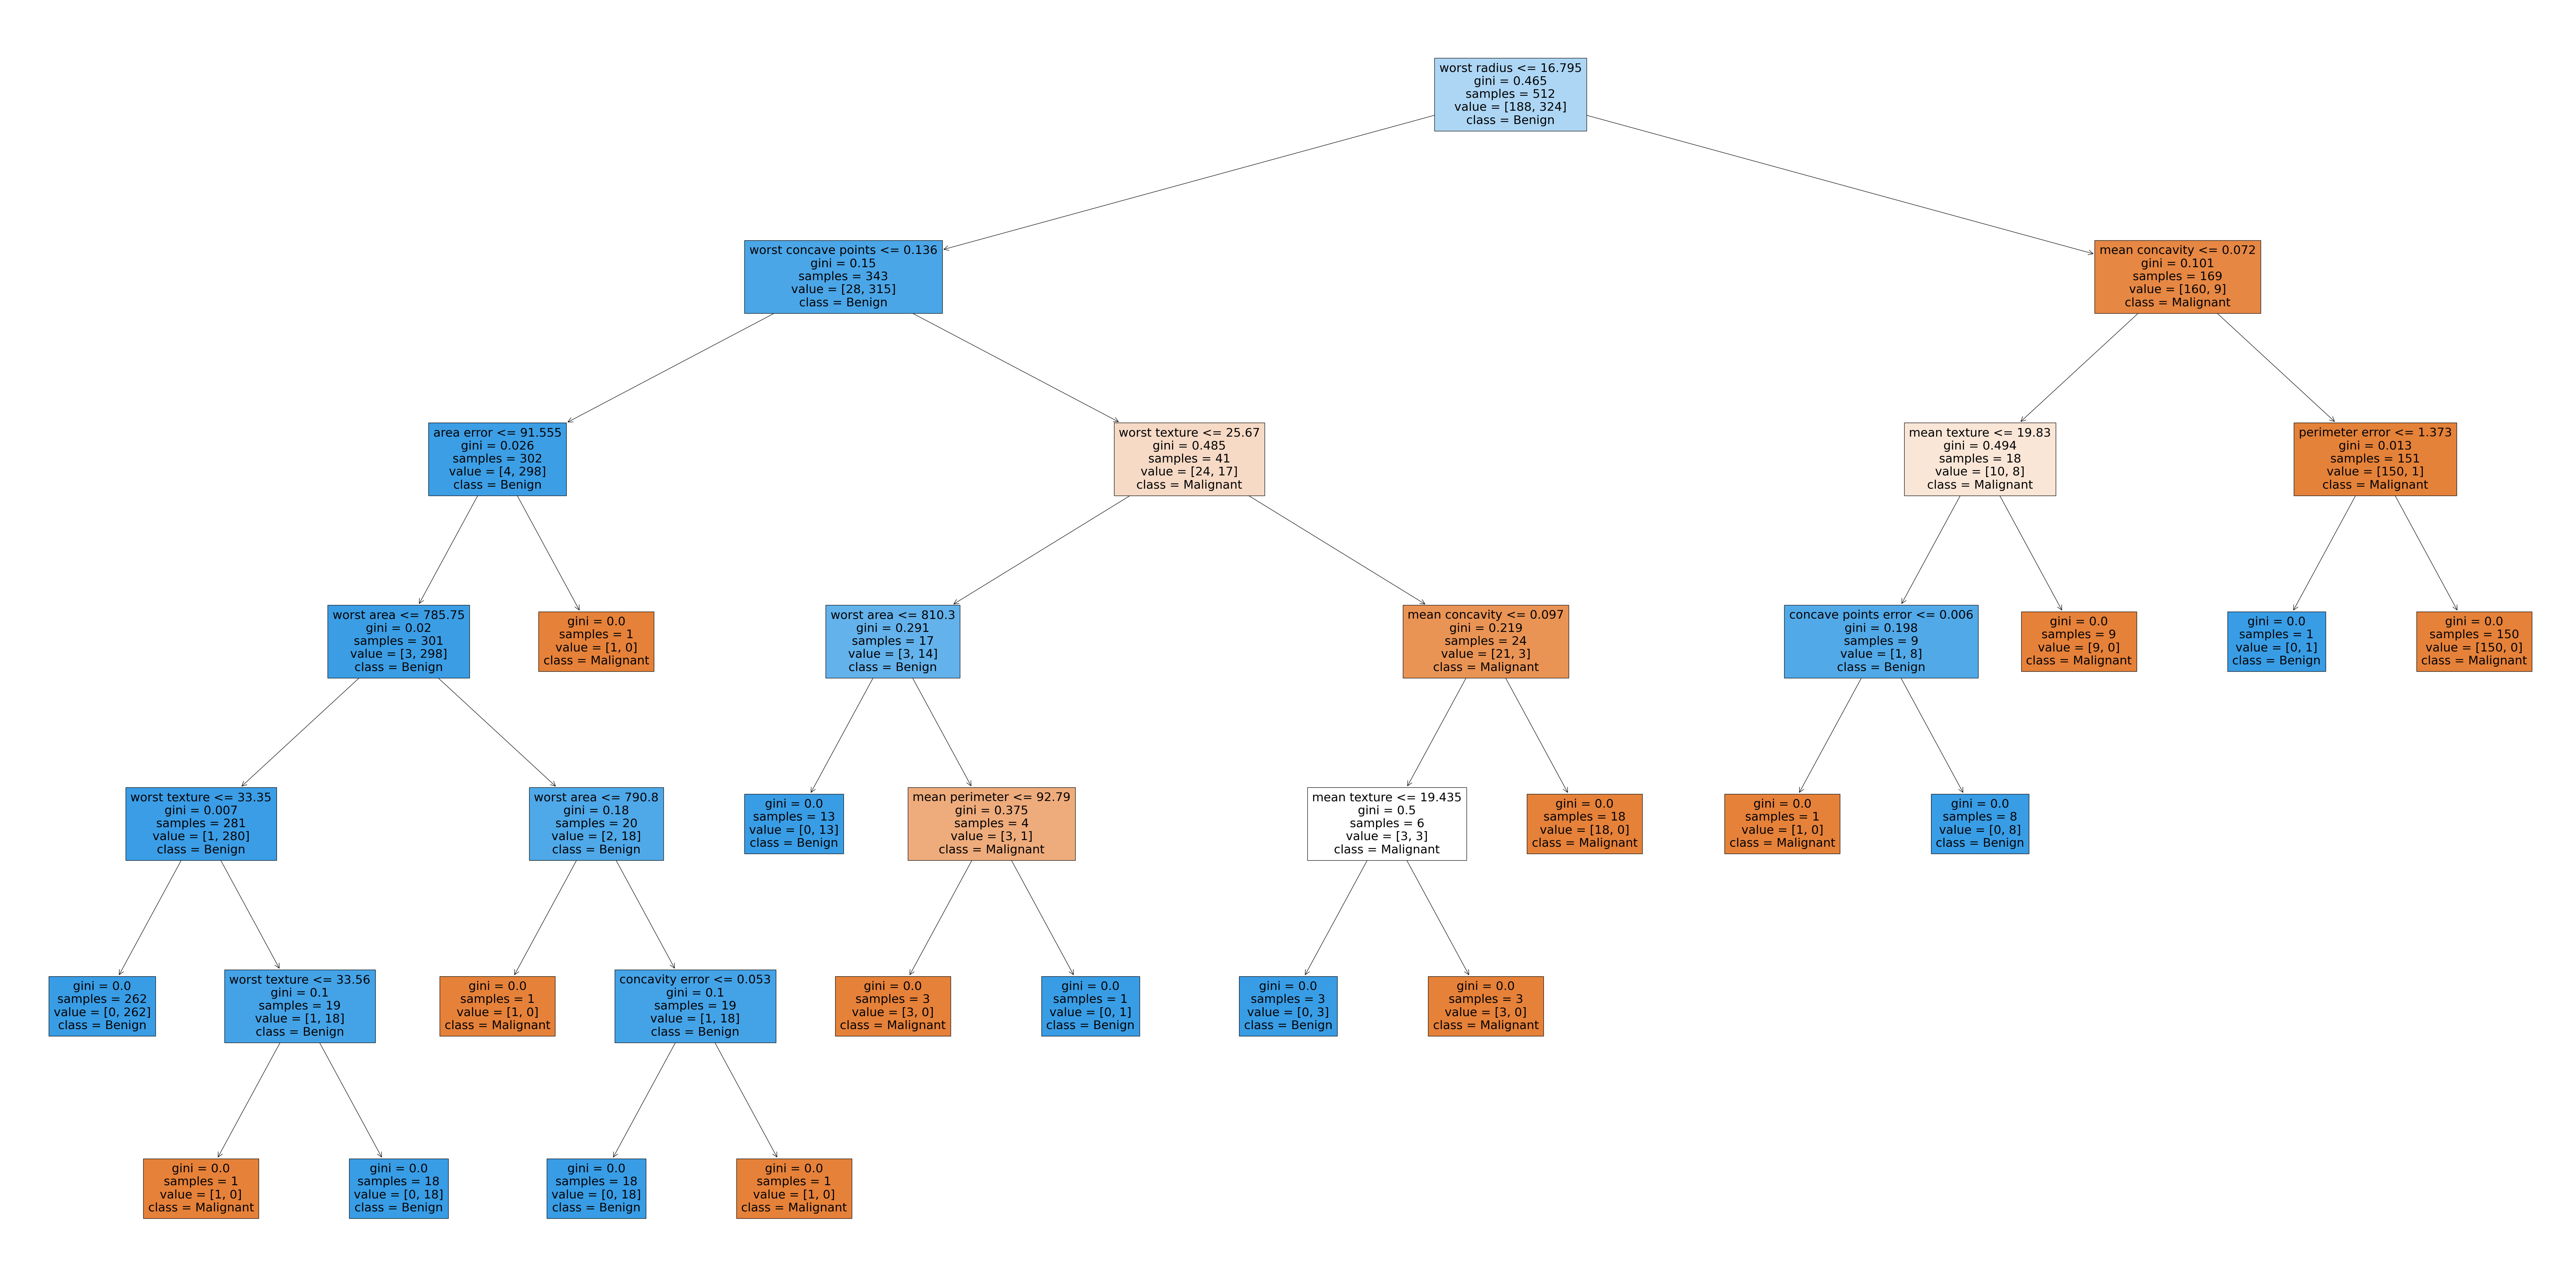

<Figure size 640x480 with 0 Axes>

In [129]:
fig = plt.figure(figsize=(100,50))
tree.plot_tree(dt, feature_names=list(train_bc.drop(columns='target')), filled = True, class_names=['Malignant', 'Benign'])
plt.show()
plt.savefig('dt.png')

### Decision tree pruning

In [131]:
dt = DecisionTreeClassifier(min_samples_split=100, min_samples_leaf=30)

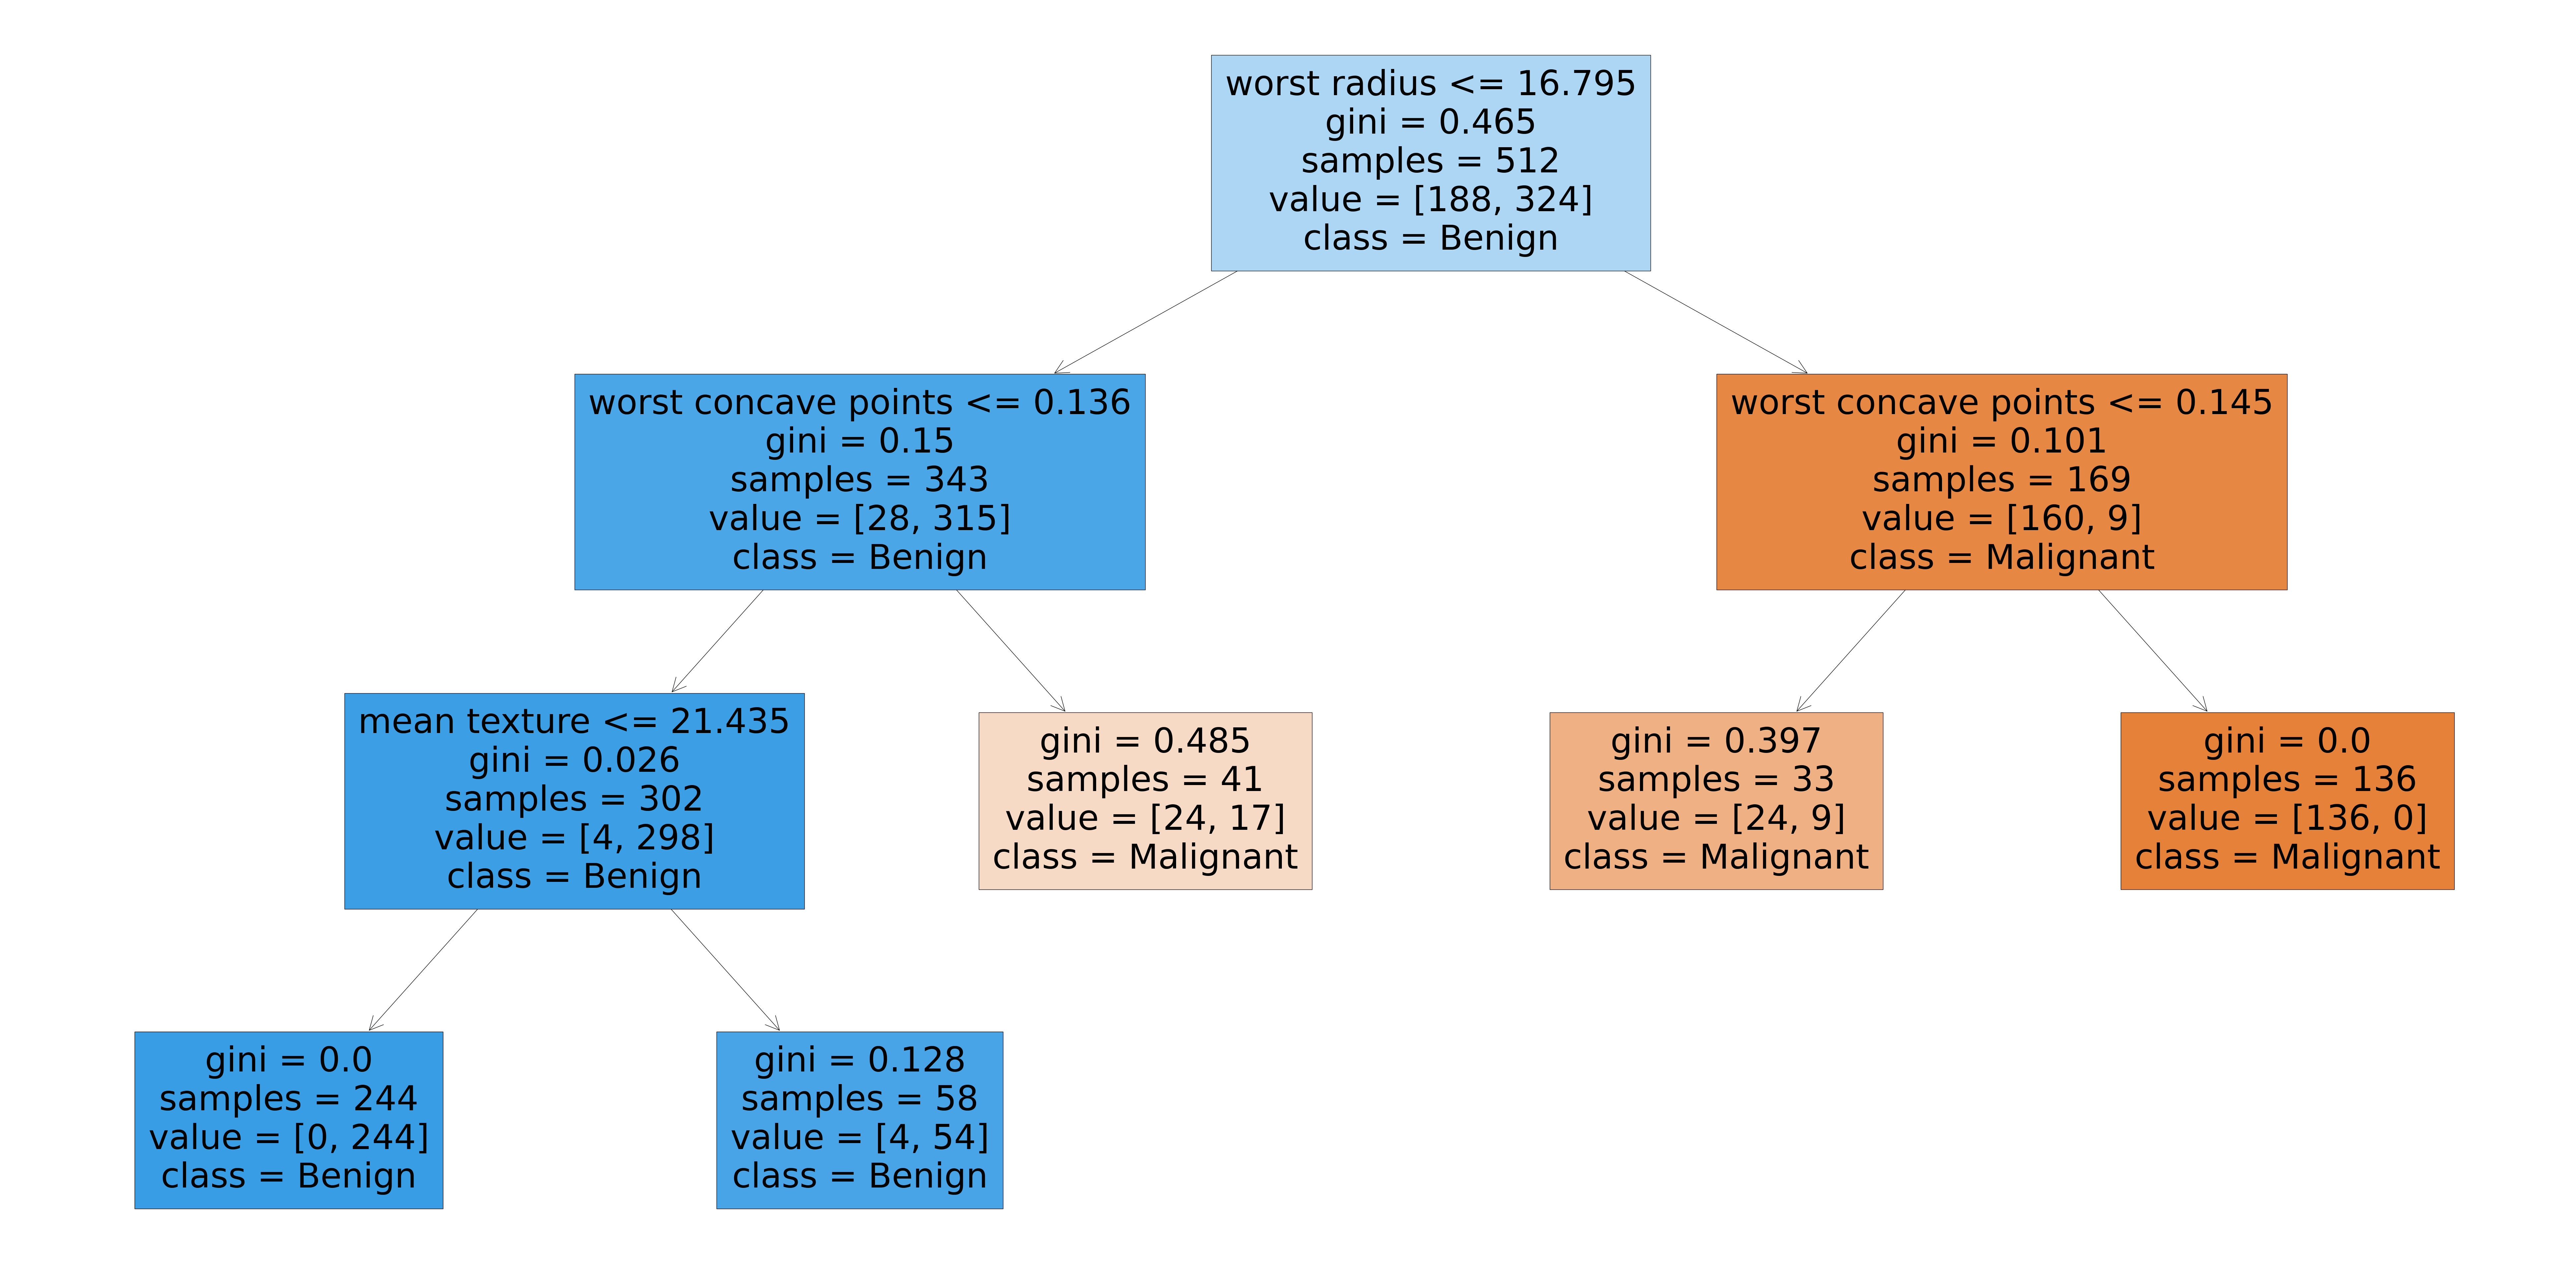

<Figure size 640x480 with 0 Axes>

In [133]:
dt.fit(train_bc.drop(columns='target'), train_bc.target)
fig = plt.figure(figsize=(100,50))
tree.plot_tree(dt, feature_names=list(train_bc.drop(columns='target')), filled = True, class_names=['Malignant', 'Benign'])
plt.show()
plt.savefig('dt.png')